# Basic Neural Network for Classification on Iris Flowers

In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [129]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower)
    # Hidden layer 1 (no. of neurons)
    # Hidden layer 2 (n)
    # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, output_features=3):
        super().__init__() # instantiate our nn.Module
        self.layer1 = nn.Linear(in_features, h1)
        self.layer2 = nn.Linear(h1, h2)
        self.output = nn.Linear(h2, output_features)

    # Forward propagation
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output(x)
        return x

In [130]:
# Randomisation
torch.manual_seed(66)
# Instance of model
model = Model()

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [133]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [134]:
# Change the datatype of last column from strings to floats
df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)
df

/var/folders/kc/4swzx7w979z6w9js5c61gt7h0000gn/T/ipykernel_18506/1561505828.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [135]:
# Train Test Split! Set X, y
X = df.drop('species', axis=1)
y = df['species']

In [136]:
# Convert to numpy arrays
X = X.values
y = y.values

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [139]:
# Convert X to float tensor, y to long tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [140]:
# Set the criterion of model to measure the error
cost = nn.CrossEntropyLoss()
# Choose Adam optimiser, learning rate
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [141]:
# Training the model
# Set epochs
epochs = 100
losses = []

for i in range(epochs):
    
    # Forward propagation
    y_pred = model.forward(X_train)
    
    # Keep on track of our losses
    loss = cost(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    # Print out each iteration
    if (i + 1) % 10 == 0:
        print(f"Epoch: {i+1}, Loss: {loss}")
    
    # Back Propagation
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch: 10, Loss: 1.0069382190704346
Epoch: 20, Loss: 0.7983543276786804
Epoch: 30, Loss: 0.5373232960700989
Epoch: 40, Loss: 0.38564741611480713
Epoch: 50, Loss: 0.2520734965801239
Epoch: 60, Loss: 0.14548973739147186
Epoch: 70, Loss: 0.09266415983438492
Epoch: 80, Loss: 0.07205759733915329
Epoch: 90, Loss: 0.0631786361336708
Epoch: 100, Loss: 0.058513741940259933


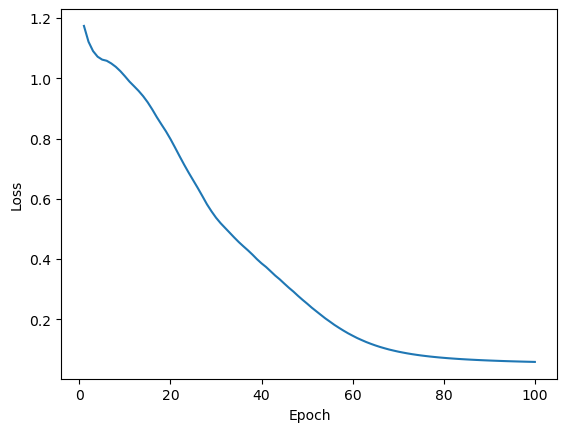

In [142]:
# Plot the result
plt.plot(range(1, epochs + 1), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [143]:
# Model Evaluation on Test Dataset (validation of model on test set)
with torch.no_grad(): # turn off back propagation
    y_eval = model.forward(X_test) # X_test are features from test sets, y_eval are predictions
    loss = cost(y_eval, y_test)    

In [144]:
loss

tensor(0.0975)

In [145]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        if y_test[i] == 0:
            x = "Setosa"
        elif y_test[i] == 1:
            x = "Versicolor"
        else:
            x = "Virginica"
        # The flower species our netwok predicts
        print(f"{i+1:<3} {str(y_val):<30} \t {x:<12} \t {y_val.argmax().item()}")
        # Correct/not
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f"\n{correct} correct predictions in total")

1   tensor([-2.7878,  4.5250, -1.4885]) 	 Versicolor   	 1
2   tensor([-4.4145,  4.7272,  0.4923]) 	 Versicolor   	 1
3   tensor([-4.4074,  4.5265,  0.6970]) 	 Versicolor   	 1
4   tensor([  6.5908,   0.3712, -11.7378]) 	 Setosa       	 0
5   tensor([-3.3257,  4.8213, -1.1129]) 	 Versicolor   	 1
6   tensor([-2.3960,  4.2852, -1.7356]) 	 Versicolor   	 1
7   tensor([  6.2632,   0.3174, -11.0081]) 	 Setosa       	 0
8   tensor([  7.0512,   0.2816, -12.4717]) 	 Setosa       	 0
9   tensor([ 5.5570,  0.3659, -9.7361]) 	 Setosa       	 0
10  tensor([-7.8112,  4.2049,  5.3830]) 	 Virginica    	 2
11  tensor([-8.2662,  3.6257,  6.5837]) 	 Virginica    	 2
12  tensor([-8.0384,  3.8876,  5.9915]) 	 Virginica    	 2
13  tensor([  6.0451,   0.3273, -10.6030]) 	 Setosa       	 0
14  tensor([-6.3007,  3.8103,  3.8749]) 	 Virginica    	 2
15  tensor([-8.7604,  2.8779,  8.0251]) 	 Virginica    	 2
16  tensor([ 5.3805,  0.3802, -9.4088]) 	 Setosa       	 0
17  tensor([-2.2944,  3.9960, -1.4515]) 	 Ve

In [146]:
# Evaluate new data on the network
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [147]:
with torch.no_grad():
    print(model(new_iris))

tensor([  5.8432,   0.3364, -10.2280])


In [148]:
# Save our model
torch.save(model.state_dict(), 'basic_iris_model.pt')

In [149]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('basic_iris_model.pt'))

/var/folders/kc/4swzx7w979z6w9js5c61gt7h0000gn/T/ipykernel_18506/459182242.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('basic_ir

<All keys matched successfully>

In [150]:
new_model.eval()

Model(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)